# **StackExchange question quality detection**

Aim: Categorise the StackOverflow questions into various quality classes.


Create a program to label the data into three categories:
1. Good-Quality questions: Questions for which score is greater than 5 and answer
count is greater than 0 should be labelled as good quality questions.
2. Low-Quality questions: Questions for which the score is between 0 to 5 and having
no answers should be labelled as low-quality questions.
3. Very-low quality questions: Questions which have negative scores

**Feature Extraction:** Since you are performing the labelling by yourself, any set of features
can be used for the classification scores and answer_count. Your task is to come up with a
feature set which allows you to get more accuracy.


## Info about the dataset and it's format.

dataset link: *https://drive.google.com/drive/folders/15xd3v1mSaeGILRnpUUa2V-r2AbGp26kH?usp=sharing*

The folder contains two files, one is the zipped file
containing multiple XML files, another is a readme file describing the details related to each
xml file. Our focus is on Post.xml only.

Our sample data in XML would look like this.

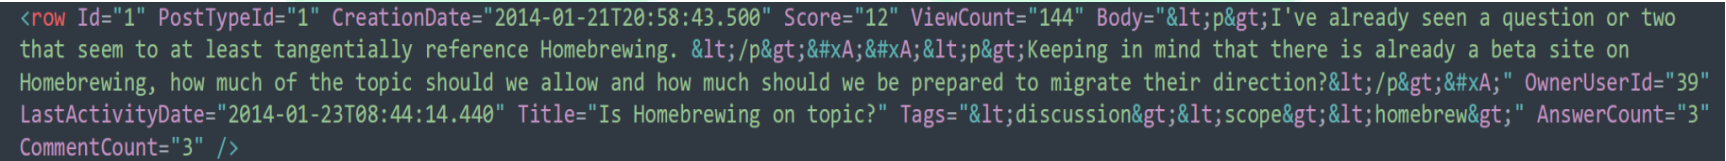

Data schema:

   - **posts**.xml
       - Id
       - PostTypeId
          - 1: Question
          - 2: Answer
       - ParentID (only present if PostTypeId is 2)
       - AcceptedAnswerId (only present if PostTypeId is 1)
       - CreationDate
       - Score
       - ViewCount
       - Body
       - OwnerUserId
       - LastEditorUserId
       - LastEditorDisplayName="Jeff Atwood"
       - LastEditDate="2009-03-05T22:28:34.823"
       - LastActivityDate="2009-03-11T12:51:01.480"
       - CommunityOwnedDate="2009-03-11T12:51:01.480"
       - ClosedDate="2009-03-11T12:51:01.480"
       - Title=
       - Tags=
       - AnswerCount
       - CommentCount
       - FavoriteCount



In [2]:
#importing necessary libraries
import numpy as np
import pandas as pd
import statistics as stat

#To plot and visualize data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Mounting the drive where our data is located.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


To parse XML file we will use this ElementTree package.

In [4]:
import xml.etree.ElementTree as ET 

In [5]:
tree = ET.parse('/content/drive/MyDrive/Guvi_collab/Posts.xml') #our dataset link .xml file

In [6]:
root=tree.getroot() #get the root node of the XML file
root.tag

'posts'

In [7]:
#sample of first 5 entries of our XML file
for child in root[0:5]:
  print(child.attrib)

{'Id': '1', 'PostTypeId': '1', 'AcceptedAnswerId': '5', 'CreationDate': '2010-11-02T18:59:01.140', 'Score': '76', 'ViewCount': '13803', 'Body': '<p>I often hear about subatomic particles having a property called "spin" but also that it doesn\'t actually relate to spinning about an axis like you would think. Which particles have spin? What does spin mean if not an actual spinning motion?</p>\n', 'OwnerUserId': '7', 'LastEditorUserId': '520', 'LastEditDate': '2012-08-19T23:00:18.417', 'LastActivityDate': '2018-04-29T07:55:39.087', 'Title': 'What is spin as it relates to subatomic particles?', 'Tags': '<quantum-mechanics><particle-physics><angular-momentum><quantum-spin>', 'AnswerCount': '5', 'CommentCount': '5', 'FavoriteCount': '27'}
{'Id': '2', 'PostTypeId': '1', 'AcceptedAnswerId': '5704', 'CreationDate': '2010-11-02T19:09:48.680', 'Score': '29', 'ViewCount': '2641', 'Body': "<p>How would you explain string theory to non physicists such as myself? I'm specially interested on how plaus

In [8]:
elements=[]
for child in root:
  elements.append(child.attrib)

In [9]:
print('Length of the parsed XML data:',len(elements))
print('Datatype of the parsed elements:',type(elements[0]))

Length of the parsed XML data: 345199
Datatype of the parsed elements: <class 'dict'>


Now that we converted our huge data into list of dictionaries, we can swiftly convert it into dataframe for our analysis.

In [10]:
df=pd.DataFrame(elements)

In [11]:
print('Data contains {} rows and {} columns'.format(df.shape[0],df.shape[1]))

Data contains 345199 rows and 21 columns


In [12]:
df.head()

,Id,PostTypeId,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastEditorUserId,LastEditDate,...,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ParentId,OwnerDisplayName,ClosedDate,LastEditorDisplayName,CommunityOwnedDate
0,1,1,5,2010-11-02T18:59:01.140,76,13803,<p>I often hear about subatomic particles havi...,7,520,2012-08-19T23:00:18.417,...,What is spin as it relates to subatomic partic...,<quantum-mechanics><particle-physics><angular-...,5,5,27,NaN,NaN,NaN,NaN,NaN
1,2,1,5704,2010-11-02T19:09:48.680,29,2641,<p>How would you explain string theory to non ...,23,2451,2018-12-17T16:03:14.737,...,What is your simplest explanation of the strin...,<string-theory><education>,4,4,8,NaN,NaN,NaN,NaN,NaN
2,3,1,180,2010-11-02T19:11:05.857,35,2412,<p>This is a question that has been posted at ...,40,2451,2013-01-28T22:30:52.200,...,"Lie theory, Representations and particle physics",<particle-physics><group-theory><representatio...,3,5,13,NaN,NaN,NaN,NaN,NaN
3,4,2,NaN,2010-11-02T19:12:26.543,22,NaN,<p>Imagine going to the rest frame of a massiv...,20,NaN,NaN,...,NaN,NaN,NaN,3,NaN,1,NaN,NaN,NaN,NaN
4,5,2,NaN,2010-11-02T19:15:20.813,48,NaN,<p>Spin is a technical term specifically refer...,13,75633,2017-12-13T08:24:54.477,...,NaN,NaN,NaN,0,NaN,1,NaN,NaN,NaN,NaN


In [ ]:
df.tail()

,Id,PostTypeId,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastEditorUserId,LastEditDate,...,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ParentId,OwnerDisplayName,ClosedDate,LastEditorDisplayName,CommunityOwnedDate
345194,483783,1,NaN,2019-06-02T03:10:36.743,0,5,"<p>Reading through <a href=""https://arxiv.org/...",233050,NaN,NaN,...,Covariant derivative in a basis,<general-relativity><differential-geometry><te...,0,0,NaN,NaN,NaN,NaN,NaN,NaN
345195,483784,2,NaN,2019-06-02T03:14:10.497,0,NaN,"<p>First of all, @Bill Watts is correct on eve...",199893,NaN,NaN,...,NaN,NaN,NaN,0,NaN,483766,NaN,NaN,NaN,NaN
345196,483785,1,NaN,2019-06-02T03:40:36.237,0,8,<p>I have a problem at my office which is simi...,233523,NaN,NaN,...,How to find the instantaneous velocity and acc...,<mass><acceleration><velocity><spring>,0,2,NaN,NaN,NaN,NaN,NaN,NaN
345197,483786,2,NaN,2019-06-02T03:53:54.890,0,NaN,<p>First let me clear up some possible confusi...,55261,NaN,NaN,...,NaN,NaN,NaN,0,NaN,483615,NaN,NaN,NaN,NaN
345198,483787,1,NaN,2019-06-02T03:56:39.137,0,5,"<p>First off, thank you.\nI love building thin...",233524,NaN,NaN,...,Simple but cant find definitive. Effect of dia...,<forces><stress-strain>,0,1,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.columns

Index(['Id', 'PostTypeId', 'AcceptedAnswerId', 'CreationDate', 'Score',
       'ViewCount', 'Body', 'OwnerUserId', 'LastEditorUserId', 'LastEditDate',
       'LastActivityDate', 'Title', 'Tags', 'AnswerCount', 'CommentCount',
       'FavoriteCount', 'ParentId', 'OwnerDisplayName', 'ClosedDate',
       'LastEditorDisplayName', 'CommunityOwnedDate'],
      dtype='object')

Column names are clear but inorder to follow a uniformity and ease of access in later part of analysis, we'll try changing all column names into lower case.

In [13]:
#we may as well create a function for changing column into lower case
def column_rename(dataframe):
  dataframe.columns=[col.lower() for col in dataframe.columns]
  return dataframe

In [14]:
df=column_rename(df)

All the colummn name is now in lowercase ✅

In [14]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345199 entries, 0 to 345198
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   id                     345199 non-null  object
 1   posttypeid             345199 non-null  object
 2   acceptedanswerid       60051 non-null   object
 3   creationdate           345199 non-null  object
 4   score                  345199 non-null  object
 5   viewcount              138710 non-null  object
 6   body                   345199 non-null  object
 7   owneruserid            335603 non-null  object
 8   lasteditoruserid       164359 non-null  object
 9   lasteditdate           169707 non-null  object
 10  lastactivitydate       345199 non-null  object
 11  title                  138710 non-null  object
 12  tags                   138710 non-null  object
 13  answercount            138710 non-null  object
 14  commentcount           345199 non-null  object
 15  

Well ! we have a data with 345199 rows and 21 columns. So our objective here is to detect the quality of questions in stackexchange. Here our data includes answers too. before performing any data cleaning and labelling, we will drop the unwanted rows which is not relevant for our analysis.

questions have posttypeid = 1
           
Answers have posttypeid = 2

In [16]:
df=df[df['posttypeid']=='1']

In [17]:

print('Now our data consists of {} rows and {} columns'.format(df.shape[0],df.shape[1]))

Now our data consists of 138710 rows and 21 columns


# Data pre-processing

We will start with each and every column and clean the data and process it into meaningful data.

The ID column and posttypeid is not adding up any value into data for analysis, hence we will drop those columns.

In [18]:
df=df.drop(['id','posttypeid'],axis=1)
df.head(2)

,acceptedanswerid,creationdate,score,viewcount,body,owneruserid,lasteditoruserid,lasteditdate,lastactivitydate,title,tags,answercount,commentcount,favoritecount,parentid,ownerdisplayname,closeddate,lasteditordisplayname,communityowneddate
0,5,2010-11-02T18:59:01.140,76,13803,<p>I often hear about subatomic particles havi...,7,520,2012-08-19T23:00:18.417,2018-04-29T07:55:39.087,What is spin as it relates to subatomic partic...,<quantum-mechanics><particle-physics><angular-...,5,5,27,NaN,NaN,NaN,NaN,NaN
1,5704,2010-11-02T19:09:48.680,29,2641,<p>How would you explain string theory to non ...,23,2451,2018-12-17T16:03:14.737,2018-12-17T16:03:14.737,What is your simplest explanation of the strin...,<string-theory><education>,4,4,8,NaN,NaN,NaN,NaN,NaN


In [19]:
#checking for number of null values in data
df.isnull().sum()

acceptedanswerid          78659
creationdate                  0
score                         0
viewcount                     0
body                          0
owneruserid                4348
lasteditoruserid          45956
lasteditdate              42997
lastactivitydate              0
title                         0
tags                          0
answercount                   0
commentcount                  0
favoritecount             80434
parentid                 138710
ownerdisplayname         133382
closeddate               117663
lasteditordisplayname    135464
communityowneddate       137239
dtype: int64

In [20]:
df.isna().mean()*100

acceptedanswerid          56.707519
creationdate               0.000000
score                      0.000000
viewcount                  0.000000
body                       0.000000
owneruserid                3.134597
lasteditoruserid          33.130993
lasteditdate              30.997765
lastactivitydate           0.000000
title                      0.000000
tags                       0.000000
answercount                0.000000
commentcount               0.000000
favoritecount             57.987167
parentid                 100.000000
ownerdisplayname          96.158893
closeddate                84.826617
lasteditordisplayname     97.659866
communityowneddate        98.939514
dtype: float64

From the above percentage of missing null values data, it's evident that the columns parentid, ownerdisplayname, lasteditordisplayname, communityowneddate are almost filled with null values for more than 95% of data and for closeddate it is 84%. Hence we will drop those columns. 

In [21]:
df=df.drop(['parentid','ownerdisplayname','lasteditordisplayname','communityowneddate','closeddate'],axis=1)
df.shape

(138710, 14)

Now that we have dropped columns, let's drop the rows which has Null values. since acceptedanswerid has 56% of missing values and favoritecount has 58% missing values, which we can't fill with mean, median or even mode. It will tamper the data. 

In [22]:
df2=df.dropna()
df2.shape

(20409, 14)

In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20409 entries, 0 to 345069
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   acceptedanswerid  20409 non-null  object
 1   creationdate      20409 non-null  object
 2   score             20409 non-null  object
 3   viewcount         20409 non-null  object
 4   body              20409 non-null  object
 5   owneruserid       20409 non-null  object
 6   lasteditoruserid  20409 non-null  object
 7   lasteditdate      20409 non-null  object
 8   lastactivitydate  20409 non-null  object
 9   title             20409 non-null  object
 10  tags              20409 non-null  object
 11  answercount       20409 non-null  object
 12  commentcount      20409 non-null  object
 13  favoritecount     20409 non-null  object
dtypes: object(14)
memory usage: 2.3+ MB


Now we have dropped all unwanted and missing data. We will go fixing the datatypes of columns.

In [27]:
#converting the data type of creationdate, lasteditdate, lastactivitydate into datetime object.
df2['creationdate']=pd.to_datetime(df2['creationdate'])
df2['lastactivitydate']=pd.to_datetime(df2['lastactivitydate'])
df2['lasteditdate']=pd.to_datetime(df2['lasteditdate'])

<ipython-input-27-ac92c0ca9f9f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['creationdate']=pd.to_datetime(df2['creationdate'])
<ipython-input-27-ac92c0ca9f9f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['lastactivitydate']=pd.to_datetime(df2['lastactivitydate'])
<ipython-input-27-ac92c0ca9f9f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

In [28]:
#fixing data type of acceptedanswerid, score, viewcount, owneruserid, lasteditoruserid, answercount, commentcount and favouritecount into int datatype.
"""df2['acceptedanswerid']=df2['acceptedanswerid'].astype(int)
df2['score']=df2['score'].astype(int)
df2['viewcount']=df2['viewcount'].astype(int)
df2['owneruserid']=df2['owneruserid'].astype(int)
df2['lasteditoruserid']=df2['lasteditoruserid'].astype(int)
df2['answercount']=df2['answercount'].astype(int)
df2['commentcount']=df2['commentcount'].astype(int)
df2['favoritecount']=df2['favoritecount'].astype(int)""" #There's a catch in using this, it slices the data on basis of view, so for effeciency purpose we'll got with .loc method which uses indexing and much better.

df2.loc[:,['acceptedanswerid','score','viewcount','owneruserid',
           'lasteditoruserid','answercount','commentcount','favoritecount']] = df2.loc[:,['acceptedanswerid','score','viewcount','owneruserid','lasteditoruserid','answercount','commentcount','favoritecount']].astype(int)


<ipython-input-28-d167cb53e70d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:,['acceptedanswerid','score','viewcount','owneruserid',


In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20409 entries, 0 to 345069
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   acceptedanswerid  20409 non-null  int64         
 1   creationdate      20409 non-null  datetime64[ns]
 2   score             20409 non-null  int64         
 3   viewcount         20409 non-null  int64         
 4   body              20409 non-null  object        
 5   owneruserid       20409 non-null  int64         
 6   lasteditoruserid  20409 non-null  int64         
 7   lasteditdate      20409 non-null  datetime64[ns]
 8   lastactivitydate  20409 non-null  datetime64[ns]
 9   title             20409 non-null  object        
 10  tags              20409 non-null  object        
 11  answercount       20409 non-null  int64         
 12  commentcount      20409 non-null  int64         
 13  favoritecount     20409 non-null  int64         
dtypes: datetime64[ns](3),

Note that we have 3 datetime columns, we'll convert it in simpler terms which will be effective for our analysis.

In [30]:
#now we try splitting the date into attributes as such, day of the week, week of the year, and hour/min of the day.

df2['created_year']=df2['creationdate'].dt.year

In [31]:
#NOTE :- isocalendar() is method in datetime dtype which will give a tuple of (year,week,date)
"""For example if the date is 2012-08-19 then it will return datetime.IsoCalendarDate(year=2012, week=33, weekday=7) """
def to_weekoftheyear(data):
  return data.isocalendar()[1]

df2['created_week']=df2['creationdate'].apply(lambda x:to_weekoftheyear(x))

In [32]:
#similarly isoweekday will returns just the day of the week starts from 1 to 7: PS- you can use isocalendar as well.
def to_dayinweek(data):
  return data.isoweekday()
  
df2['created_dayinweek']=df2['creationdate'].apply(lambda x:to_dayinweek(x))

In [33]:
df2['created_time']=df2['creationdate'].dt.hour

In [34]:
#now we try replicating the same for lasteditdate column. !!
df2['lastedited_year']=df2['lasteditdate'].dt.year
df2['lastedited_weekofyear']=df2['lasteditdate'].apply(lambda x:to_weekoftheyear(x))
df2['lastedited_dayofweek']=df2['lasteditdate'].apply(lambda x:to_dayinweek(x))
df2['lastedited_hour']=df2['lasteditdate'].dt.hour

For the lastactivity column we will try apply a different strategy, because it is relative and some values are as same as the last edited date.

In [35]:
#getting the time delta between last edited and last activity
d=df2['lastactivitydate']-df2['lasteditdate']

In [36]:
#creating 2 new columns with the difference in days and seconds
df2['edited_to_activity_days']=d.dt.days
df2['edited_to_activty_sec']=d.dt.seconds

In [37]:
df2.tail(3)

,acceptedanswerid,creationdate,score,viewcount,body,owneruserid,lasteditoruserid,lasteditdate,lastactivitydate,title,...,created_year,created_week,created_dayinweek,created_time,lastedited_year,lastedited_weekofyear,lastedited_dayofweek,lastedited_hour,edited_to_activity_days,edited_to_activty_sec
344862,483455,2019-05-31 00:33:56.550,3,113,<p>I know that we can define electric fields b...,233363,2451,2019-05-31 03:15:34.507,2019-06-01 00:11:20.790,What is an electric field?,...,2019,22,5,0,2019,22,5,3,0,75346
345028,483609,2019-05-31 21:55:12.723,15,1096,<p>I hope you will understand me correctly bec...,233452,2451,2019-06-01 11:39:01.180,2019-06-01 11:39:01.180,How do photons get into the eyes?,...,2019,22,5,21,2019,22,6,11,0,0
345069,483659,2019-06-01 08:27:46.347,3,51,<p>In all discussions regarding the Lagrangian...,167709,2451,2019-06-01 10:11:50.943,2019-06-01 10:14:02.980,Why is there a Lagrangian?,...,2019,22,6,8,2019,22,6,10,0,132


In [38]:
#Now that we extracted data from the 3 datetime type columns, we can finally drop those.
df3=df2.drop(['creationdate','lasteditdate','lastactivitydate'],axis=1)

In [39]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20409 entries, 0 to 345069
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   acceptedanswerid         20409 non-null  int64 
 1   score                    20409 non-null  int64 
 2   viewcount                20409 non-null  int64 
 3   body                     20409 non-null  object
 4   owneruserid              20409 non-null  int64 
 5   lasteditoruserid         20409 non-null  int64 
 6   title                    20409 non-null  object
 7   tags                     20409 non-null  object
 8   answercount              20409 non-null  int64 
 9   commentcount             20409 non-null  int64 
 10  favoritecount            20409 non-null  int64 
 11  created_year             20409 non-null  int64 
 12  created_week             20409 non-null  int64 
 13  created_dayinweek        20409 non-null  int64 
 14  created_time             20409 non-nu

In [ ]:
# continue -- 
#need to calculate length of string for all 3 object columns and store it in new column
#apply NLP preprocessing clean data..get it in vectorized format
#assign good,bad, medium labels based on 2 columns...and drop those afterwards..
#drop the object columns as well..
#fit classifier models and get the score.

Now all our focus is on object columns, which is body, title, tags. We'll convert the string into numerical which can be used for our model to predict.

Before that cleaning of the data is must, since we have html tags, stopwords etc.

In [40]:
print("-----------------Sample data from column 'body'--------------------")
print(df3['body'][1])
print('length of body :',len(df3['body'][1]))
print("-----------------Sample data from column 'title'--------------------")
print(df3['title'][1])
print('length of title :',len(df3['title'][1]))
print("-----------------Sample data from column 'tags'--------------------")
print(df3['tags'][1])
print('length of tags :',len(df3['tags'][1]))

-----------------Sample data from column 'body'--------------------
<p>How would you explain string theory to non physicists such as myself? I'm specially interested on how plausible is it and what is needed to successfully prove it?</p>

length of body : 170
-----------------Sample data from column 'title'--------------------
What is your simplest explanation of the string theory?
length of title : 55
-----------------Sample data from column 'tags'--------------------
<string-theory><education>
length of tags : 26


In [42]:
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
#importing necessary modules for Data cleaning
import re
import string
import unidecode

In [44]:
#To remove stop words and lemmatize
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [45]:
lemmatizer = nltk.stem.WordNetLemmatizer() #creating lemmatizer variable

#we'll define a function to clean the text string.
def clean_text(text):
    """Basic cleaning of string text"""
    
    # remove html tags from our string
    text=re.sub("(<->)","",text) #note that this regex pattern will remove < , > and - which we observed in tags column a lot.
    
    #remove non-ascii and digits
    text=re.sub("(\\W|\\d)"," ",text)
    
    #remove whitespace
    text=text.strip()
    
    #removing single charcters pattern
    text=re.sub('\s+[a-zA-Z]\s+' ," ",text)
    single_char=[word for word in text.split() if len(word)>1]
    text=" ".join(single_char)
    
    #remove accented characters
    text=unidecode.unidecode(text) #To remove accented string like a^.
    
    #to make words into lowercase
    text=text.lower()
    
    #removing stop words from the paragraph
    words = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    text = " ".join(words)

    #lemmatize the text
    lemma=[lemmatizer.lemmatize(word) for word in text.split()]
    text=" ".join(lemma)

    return text

In [46]:
df3['body']=df3['body'].apply(lambda x:clean_text(x))
df3['title']=df3['title'].apply(lambda x:clean_text(x))
df3['tags']=df3['tags'].apply(lambda x:clean_text(x))

In [47]:
print('After cleaning the data')
print("-----------------Sample data from column 'body'--------------------")
print(df3['body'][1])
print('length of body :',len(df3['body'][1]))
print("-----------------Sample data from column 'title'--------------------")
print(df3['title'][1])
print('length of title :',len(df3['title'][1]))
print("-----------------Sample data from column 'tags'--------------------")
print(df3['tags'][1])
print('length of tags :',len(df3['tags'][1]))

After cleaning the data
-----------------Sample data from column 'body'--------------------
would explain string theory non physicist specially interested plausible needed successfully prove
length of body : 98
-----------------Sample data from column 'title'--------------------
simplest explanation string theory
length of title : 34
-----------------Sample data from column 'tags'--------------------
string theory education
length of tags : 23


# Vectorizing Text Data
Next stage of data extraction involves converting string into meaningful numerical columns and vectorizing our text string data.

1) Create a column which stores the length of strings of column body, title and tags.

2) Use an NLP package to vectorize our data and store it in separate column.

In [48]:
df3['body_length']=df3['body'].apply(lambda x : len(x))

In [49]:
df3['title_length']=df3['title'].apply(lambda x :len(x))

In [50]:
df3['tag_length']=df3['tags'].apply(lambda x: len(x))

NLP - We have several libraries available to vectorize text data into numerical vectors. One of such package is **spacy**, which is a widely used NLP package for tokenizing, vectorizing etc..

we'll use the spacy ('en_core_web_lg') for our vectorization purpose.
referred from *https://spacy.io/usage/spacy-101/*

In [ ]:
!python -m spacy download en_core_web_lg

In [207]:
import spacy #using spacy module for vectorization
nlp= spacy.load('en_core_web_lg') #en_core_web_lg is the pre-trained model by spacy


In [208]:
df3['body_vector']=df3['body'].apply(lambda text: nlp(text).vector) #returns 300 sized vectors of text representation

In [209]:
df3['title_vector']=df3['title'].apply(lambda text: nlp(text).vector)

In [53]:
df3['tags_vector']=df3['tags'].apply(lambda text: nlp(text).vector)

In [45]:
len(df3['tags_vector'][1])

300

Now we don't need our text columns anymore, since we have converted it into vecotrs.

In [211]:
df3=df3.drop(['body','title','tags'],axis=1)

In [213]:
df3.head(2)

,acceptedanswerid,score,viewcount,owneruserid,lasteditoruserid,answercount,commentcount,favoritecount,created_year,created_week,...,lastedited_dayofweek,lastedited_hour,edited_to_activity_days,edited_to_activty_sec,body_length,title_length,tag_length,tags_vector,body_vector,title_vector
0,5,76,13803,7,520,5,5,27,2010,44,...,7,23,2078,32120,149,31,62,"[-0.46113878, 2.1435823, -0.18066682, 0.264071...","[-1.0814192, 0.8792322, -1.4095931, -0.5479524...","[-0.3920275, 0.403405, -0.055565, -0.71702754,..."
1,5704,29,2641,23,2451,4,4,8,2010,44,...,1,16,0,0,98,34,23,"[-2.6452668, 0.1602133, 3.5103333, 0.46385336,...","[-1.9718031, 1.1061325, 0.23696084, -0.3535891...","[-1.4554175, 0.57866, 2.86483, 0.37347752, 2.1..."


Now we'll categorize the questions based on 3 categories given in our problem statement. 

Good-Quality questions: Questions for which score is greater than 5 and answer
count is greater than 0 should be labelled as good quality questions.

Low-Quality questions: Questions for which the score is between 0 to 5 and having
no answers should be labelled as low-quality questions - here we have exactly a chunk of data with score between 0 to 5 and answercount between 0 to 5 so we will label that as low

Very-low quality questions: Questions which have negative scores - but in our data we have no such so we go with rest of data as very low

In [ ]:
"""filter=[(df3['score']>5) & (df3['answercount']>5),
        ((df3['score']<5) & (df3['score']>=0)) & (df3['answercount']=0),
        (df3['score']<=0) & (df3['answercount']<=0)]
values=['good','low','very low']
df5['quality']=np.select(filter,values)""" 

In [214]:
df3.loc[((df3['score']>5) & (df3['answercount']>0)),'quality']='good'
df3.loc[(((df3['score']<5) & (df3['score']==0)) & (df3['answercount']>=0)),'quality']='low'
df3['quality'].fillna('very low',inplace=True)

In [215]:
df3.quality.value_counts()

very low    11546
good         6748
low          2115
Name: quality, dtype: int64

In [216]:
df3=df3.drop(['score','answercount',],axis=1)

In [217]:
df3['body_vector']=df3['body_vector'].apply(lambda x: x.tolist())

In [218]:
df3['title_vector']=df3['title_vector'].apply(lambda x: x.tolist())

In [219]:
df3['tags_vector']=df3['tags_vector'].apply(lambda x: x.tolist())

In [226]:
df3.head(2)

,acceptedanswerid,viewcount,owneruserid,lasteditoruserid,commentcount,favoritecount,created_year,created_week,created_dayinweek,created_time,...,lastedited_hour,edited_to_activity_days,edited_to_activty_sec,body_length,title_length,tag_length,tags_vector,body_vector,title_vector,quality
0,5,13803,7,520,5,27,2010,44,2,18,...,23,2078,32120,149,31,62,"[-0.4611387848854065, 2.143582344055176, -0.18...","[-1.0814192295074463, 0.8792322278022766, -1.4...","[-0.39202749729156494, 0.40340501070022583, -0...",good
1,5704,2641,23,2451,4,8,2010,44,2,19,...,16,0,0,98,34,23,"[-2.6452667713165283, 0.16021330654621124, 3.5...","[-1.971803069114685, 1.1061325073242188, 0.236...","[-1.455417513847351, 0.5786600112915039, 2.864...",good


In [241]:
df3.columns

Index(['acceptedanswerid', 'viewcount', 'owneruserid', 'lasteditoruserid',
       'commentcount', 'favoritecount', 'created_year', 'created_week',
       'created_dayinweek', 'created_time', 'lastedited_year',
       'lastedited_weekofyear', 'lastedited_dayofweek', 'lastedited_hour',
       'edited_to_activity_days', 'edited_to_activty_sec', 'body_length',
       'title_length', 'tag_length', 'tags_vector', 'body_vector',
       'title_vector', 'quality'],
      dtype='object')

#Data visulaisation 📊

Now our data is pretty much numerical, from this we'll try to plot the distribution and spread of values according to the each categorical types.

<Axes: xlabel='tag_length', ylabel='quality'>

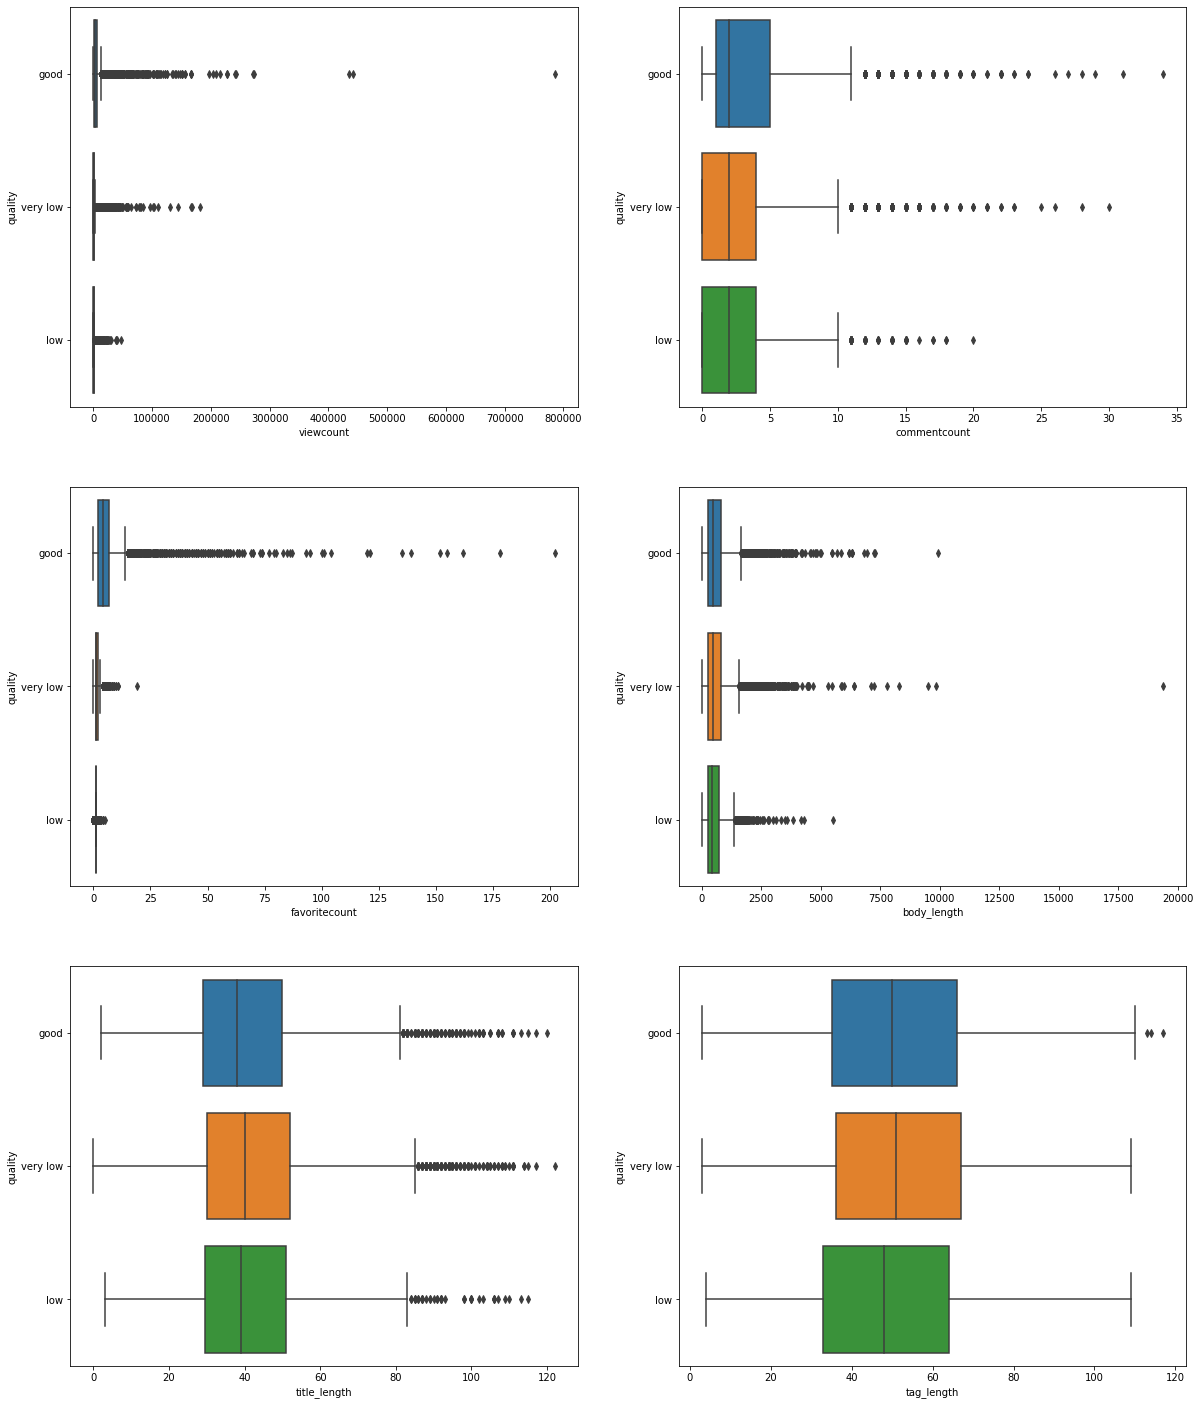

In [243]:
#boxplot for 'viewcount', 'commentcount', 'favoritecount', 'body_length', 'title_length', 'tag_length'.
plt.figure(figsize=(20,25))
plt.subplot(321)
sns.boxplot(x=df3['viewcount'],y=df3['quality'])

plt.subplot(322)
sns.boxplot(x=df3['commentcount'],y=df3['quality'])

plt.subplot(323)
sns.boxplot(x=df3['favoritecount'],y=df3['quality'])

plt.subplot(324)
sns.boxplot(x=df3['body_length'],y=df3['quality'])

plt.subplot(325)
sns.boxplot(x=df3['title_length'],y=df3['quality'])

plt.subplot(326)
sns.boxplot(x=df3['tag_length'],y=df3['quality'])


<Axes: xlabel='edited_to_activity_days', ylabel='quality'>

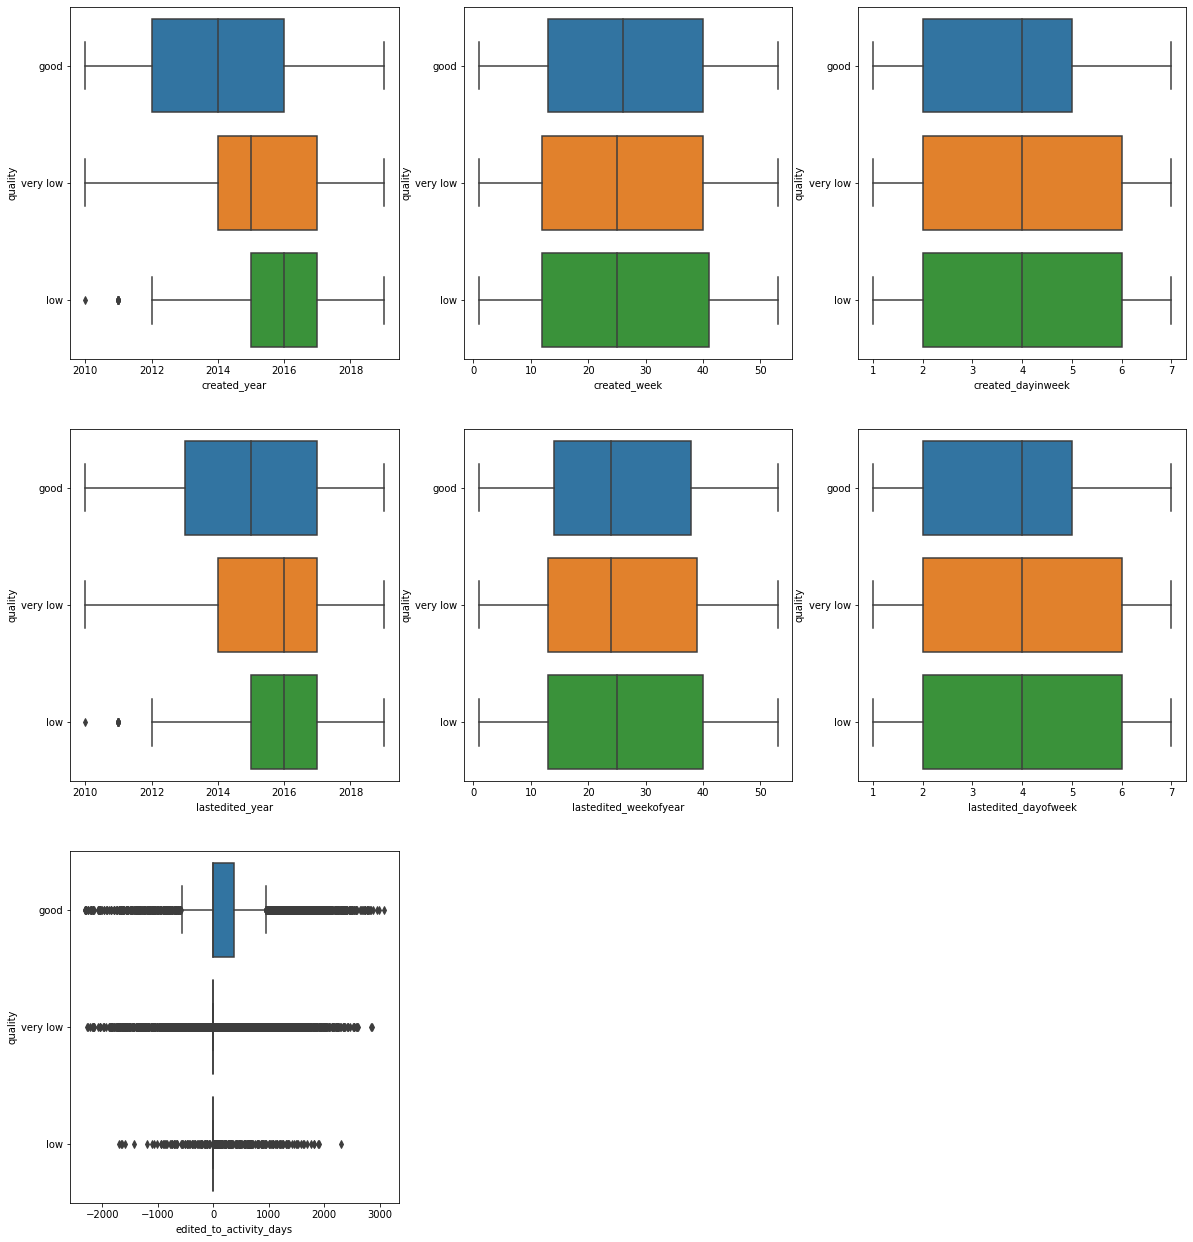

In [244]:
plt.figure(figsize=(20,22))
plt.subplot(331)
sns.boxplot(x=df3['created_year'],y=df3['quality'])

plt.subplot(332)
sns.boxplot(x=df3['created_week'],y=df3['quality'])

plt.subplot(333)
sns.boxplot(x=df3['created_dayinweek'],y=df3['quality'])

plt.subplot(334)
sns.boxplot(x=df3['lastedited_year'],y=df3['quality'])

plt.subplot(335)
sns.boxplot(x=df3['lastedited_weekofyear'],y=df3['quality'])

plt.subplot(336)
sns.boxplot(x=df3['lastedited_dayofweek'],y=df3['quality'])

plt.subplot(337)
sns.boxplot(x=df3['edited_to_activity_days'],y=df3['quality'])



Here our task is to convert our raw data into meaninful format of data in-order to try fit a ML model. So we ignore the correlation or the impact of data to outcome at this point. Meanwhile this boxplot evidently shows in some aspects the year, day of the week, viewcount, commentcount, taglength, favorite count are having slight variance in influencing the outcome of the data.

# Applying ML classification algorithms

We will proceed with fitting several models to our data and pick out the one with high accuracy and F1 score.

In [363]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from  sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score


In [327]:
x=df3.drop(['quality'],axis=1)
y=df3['quality']

There is still one processing step left to perform. Since our data has a embedded list, model won't able to intrepret it clearer. so for this we'll pass this as a single flatttened vector.

In [328]:
#This function just extends and appends our list into single list . for ex [1,2,3,[1,2,3]] into [1,2,3,1,2,3]
def flattenx(d):
  listarray=d.values.tolist()
  x_flattened=[]
  for array in listarray:
    if isinstance(array,list):
      x_flattened.extend(array)
    else:
      x_flattened.append(array)

  return x_flattened

In [329]:
#transforming our X into single vector
x_transform=x.apply(lambda x : flattenx(x),axis=1)

In [330]:
x_train, x_test, y_train, y_test = train_test_split(
    x_transform,
    y,
    test_size=0.3,
    random_state=1049
)

In [331]:
#We need to flatten our list into numpy array so that model can interpret the values.
x_train=np.stack(x_train)
x_test=np.stack(x_test)

## 1) KNN

In [253]:
best_k=np.arange(1,15)
cross_val_knn=[]
for k in best_k:
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train,y_train)
  cv_score=cross_val_score(knn,x_train,y_train,cv=10).mean()
  cross_val_knn.append(cv_score)
  print("K value : {},model score : {}, cross validation score :{} ".format(k,knn.score(x_train,y_train),cv_score))

K value : 1,model score : 1.0, cross validation score :0.5121780132626879 
K value : 2,model score : 0.7660646787064259, cross validation score :0.45254090439534816 
K value : 3,model score : 0.747935041299174, cross validation score :0.5380059021509234 
K value : 4,model score : 0.7100657986840263, cross validation score :0.5333877777843117 
K value : 5,model score : 0.6944561108777825, cross validation score :0.546897940421795 
K value : 6,model score : 0.6815063698726026, cross validation score :0.5598483690187062 
K value : 7,model score : 0.6724765504689906, cross validation score :0.5697182511913093 
K value : 8,model score : 0.6677166456670867, cross validation score :0.5731483006078568 
K value : 9,model score : 0.6632367352652947, cross validation score :0.5804280284542088 
K value : 10,model score : 0.6555368892622148, cross validation score :0.5846281409694738 
K value : 11,model score : 0.6509869802603948, cross validation score :0.5880576513320513 
K value : 12,model score

In [258]:
knn=KNeighborsClassifier(n_neighbors =10)

In [259]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [260]:
y_pred_knn=knn.predict(x_test)

In [261]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

        good       0.54      0.42      0.47      2045
         low       0.18      0.03      0.06       645
    very low       0.61      0.79      0.69      3433

    accuracy                           0.59      6123
   macro avg       0.44      0.41      0.41      6123
weighted avg       0.54      0.59      0.55      6123



In [262]:
cm=confusion_matrix(y_test,y_pred_knn)

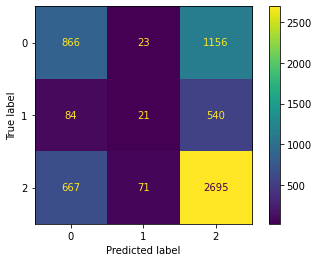

In [263]:
ConfusionMatrixDisplay(cm).plot()

## 2) logistic regression

In [ ]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)

In [ ]:
cross_val_log_model=cross_val_score(lr,x_train,y_train,cv=10).mean()

In [270]:
cross_val_log_model #cross validation score for log model.

0.623547788604595

In [271]:
print(classification_report(y_test,y_pred_lr))

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        good       0.69      0.27      0.39      2045
         low       0.00      0.00      0.00       645
    very low       0.60      0.93      0.73      3433

    accuracy                           0.61      6123
   macro avg       0.43      0.40      0.37      6123
weighted avg       0.57      0.61      0.54      6123



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [272]:
cm1=confusion_matrix(y_test,y_pred_lr)

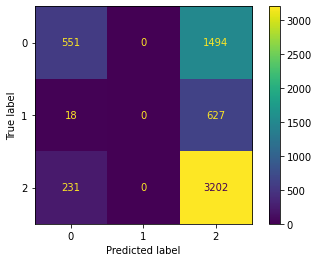

In [273]:
ConfusionMatrixDisplay(cm1).plot()

## 3) Random Forest classifier

To choose the best value of max depth for the model.

In [274]:
best_depth=np.arange(1,20)
cross_vals_rf=[]
for depth in best_depth:
    rf=RandomForestClassifier(max_depth=depth,random_state=0)
    rf.fit(x_train,y_train)
    cv_score=cross_val_score(rf,x_train,y_train,cv=10).mean()
    cross_vals_rf.append(cv_score)
    print("Max depth: {}, model score: {}, cross validation score: {}".format(depth,rf.score(x_train,y_train),cv_score))


Max depth: 1, model score: 0.6455270894582108, cross validation score: 0.6439173640064844
Max depth: 2, model score: 0.7026459470810584, cross validation score: 0.6999858865869651
Max depth: 3, model score: 0.7206355872882543, cross validation score: 0.7169256575968386
Max depth: 4, model score: 0.7267254654906902, cross validation score: 0.7212655811099807
Max depth: 5, model score: 0.7326053478930421, cross validation score: 0.7250457215776444
Max depth: 6, model score: 0.7411451770964581, cross validation score: 0.7267253157386119
Max depth: 7, model score: 0.748705025899482, cross validation score: 0.7270753577848214
Max depth: 8, model score: 0.7621447571048579, cross validation score: 0.7290350149857004
Max depth: 9, model score: 0.7753044939101218, cross validation score: 0.7298046370402606
Max depth: 10, model score: 0.7931541369172617, cross validation score: 0.7285449169170818
Max depth: 11, model score: 0.8149937001259975, cross validation score: 0.7302251971467383
Max depth

Well our model works great when the depth is around 16, model score and cv score are almost maximum. So we'll proceeding with this.

In [283]:
rf_model=RandomForestClassifier(max_depth=16,random_state=0)
rf_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=16, random_state=0)

In [281]:
y_pred_rf=rf_model.predict(x_test)

In [282]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

        good       0.79      0.65      0.72      2045
         low       0.45      0.01      0.02       645
    very low       0.70      0.90      0.79      3433

    accuracy                           0.72      6123
   macro avg       0.65      0.52      0.51      6123
weighted avg       0.70      0.72      0.68      6123



In [278]:
cm2=confusion_matrix(y_test,y_pred_rf)

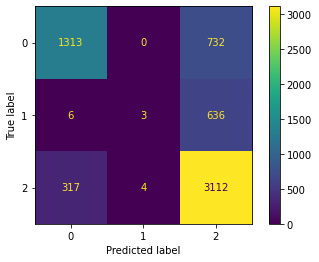

In [279]:
ConfusionMatrixDisplay(cm2).plot()

## 4) Multinomial Naive bayes

Multinomial Naive bias needs our input vectors as ndarray, so here we can see our text data vector we combined is previously stored in x_train, we'll just slice it from the index we want and scale it on MinMaxscaler since model doesn't take negative values too. Then we'll try fit it into the data.

In [357]:
xnb_train=pd.DataFrame(x_train)
xnb_test=pd.DataFrame(x_test)
xnb_train=xnb_train.iloc[:,19:]
xnb_test=xnb_test.iloc[:,19:]

In [367]:
#scaling the data
MMS = MinMaxScaler(feature_range=(0,1))
def scale_columns(df):
    for col in df.columns:
        df[col] = MMS.fit_transform(df[[col]])
    return df

In [368]:
xnb_train=scale_columns(xnb_train)

In [370]:
xnb_test=scale_columns(xnb_test)

In [378]:
mnb=MultinomialNB(alpha=0.01)
mnb.fit(xnb_train,y_train)

MultinomialNB(alpha=0.01)

In [379]:
y_pred_mnb=mnb.predict(xnb_test)

In [382]:
cross_val_mnb_model=cross_val_score(mnb,xnb_train,y_train,cv=15).mean()
cross_val_mnb_model

0.5776284385737506

In [380]:
print(classification_report(y_test,y_pred_mnb))

              precision    recall  f1-score   support

        good       0.50      0.10      0.17      2045
         low       0.00      0.00      0.00       645
    very low       0.57      0.95      0.71      3433

    accuracy                           0.56      6123
   macro avg       0.36      0.35      0.29      6123
weighted avg       0.49      0.56      0.45      6123



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [376]:
cm3=confusion_matrix(y_test,y_pred_mnb)

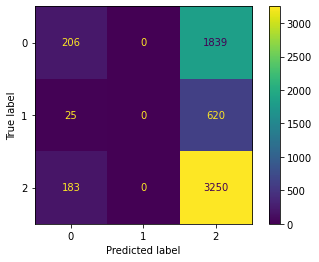

In [377]:
ConfusionMatrixDisplay(cm3).plot()